<div class="alert alert-info">
    <font color="#25B0BF"><h2>Muhammad Rizallul Hakim (09011381722085)</h2></font>
    <h2><em>Gender Classification Based on Voice data</em></h2>
</div>

Dimorphism adalah sifat suara yang sangat diperhatikan oleh manusia. Intonasi, kecepatan bicara,
dan durasi adalah karakteristik tertentu yang membedakan suara manusia, terutama suara pria dan wanita. Dimorfisme yang dirasakan mencakup 98,8% yang terdiri dari jenis kelamin pembicara dan
frekuensi masing-masing. Namun, variasi dalam gender tidak dapat diprediksi dengan voice vokal. Beberapa
Nada suara dapat bervariasi antara pria dan wanita sehingga sulit untuk memprediksi pria dan wanita secara akurat. Dengan Machine Learning kita dapat mengidentifikasi gender voice masing-masing dengan bantuan
teknik yang digunakan untuk pemrosesan ucapan di lingkungan waktu nyata.

# Dataset
Dataset ini dibuat untuk mengidentifikasi suara sebagai pria atau wanita, berdasarkan pada sifat akustik suara dan ucapan.<br>
Dataset terdiri dari 3.168 sampel suara yang direkam, dikumpulkan dari pembicara pria dan wanita.<br>
Sampel suara pra-diproses oleh analisis akustik dalam R menggunakan seewave dan tuneR Package, dengan rentang frekuensi yang dianalisis dari 0 hz-280 hz (human vocal range).

<div class="alert alert-success">
    <font color="#000000"><h3>Properti akustik berikut dari setiap suara diukur dan dimasukkan dalam CSV:</h3>
<ol align="justify">
    <li>meanfreq: mean frequency (in kHz)</li>
    <li>sd: standard deviation of frequency</li>
    <li>median: median frequency (in kHz)</li>
    <li>Q25: first quantile (in kHz)</li>
    <li>Q75: third quantile (in kHz)</li>
    <li>IQR: interquantile range (in kHz)</li>
    <li>skew: skewness (see note in specprop description)</li>
    <li>kurt: kurtosis (see note in specprop description)</li>
    <li>sp.ent: spectral entropy</li>
    <li>sfm: spectral flatness</li>
    <li>mode: mode frequency</li>
    <li>centroid: frequency centroid (see specprop)</li>
    <li>peakf: peak frequency (frequency wit highest energy)</li>
    <li>meanfun: average of fundamental frequency measured across acoustic signal</li>
    <li>minfun: minimum fundamental frequency measured across acoustic signal</li>
    <li>maxfun: maximum fundamental frequency measured across acoustic signal</li>
    <li>meandom: average of dominant frequency measured across acoustic signal</li>
    <li>mindom: minimum of dominant frequency measured across acoustic signal</li>
    <li>maxdom: maximum of dominant frequency measured across acoustic signal</li>
    <li>dfrange: range of dominant frequency measured across acoustic signal</li>
    <li>modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequenciesdivided by the frequency range</li>
    <li>label: male or female</li>
        </ol></font>
    </div>

## 1. Import Library
Pertama yang kita lakukan adalah mengimport library yang akan kita gunakan.
### Library Numpy 
Berfungsi untuk melakukan operasi vektor dan matriks dengan mengolah array dan array multidimensi.
### Library Pandas
Berfungsi untuk membaca file dataset dalam bentuk .CSV.
### Library os
Berfungsi untuk berinteraksi langsung dengan sistem operasi.
### Library Matplotlib 
Digunakan untuk visualisasi dataset sehingga memudahkan untuk dipahami.
### Library Seaborn
Digunakan Untuk Visualisasi Data Secara Statistik.
### Library Keras
Digunakan Untuk Banyaknya Hidden Layers Yang Digunakan Untuk 1 Data Set.

In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir("data"))

['voice.csv']


In [2]:
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import seaborn as sns

In [3]:
from subprocess import check_output
#print(check_output(["ls", "data"]).decode("utf8"))

from keras import Sequential
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import KFold
from sklearn.metrics import *
from keras.models import Sequential,Model
from keras.layers import *
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

Using TensorFlow backend.


## 2. import Dataset
Dataset ini memiliki 22 kolom dan 3168  baris dengan 21 kolom sebagai features dan 1 kolom (label) sebagai label yang memiliki value "male" dan "female".

In [4]:
data = pd .read_csv('data/voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
print(data.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


## 3. Mengecek apakah ada data kosong
Setelah kita menimport dataset ada baiknya kita terlebih dahulu melakukan pegecekaan terhadap dataset kita, apakah data tersebut sudah clear atau masih ada data kosong.

In [6]:
data.isnull().any().sum()

0

Pada hasil diatas "0" yang berarti dataset yang digunakan ini tidak ada data yang kosong atau sudah bersih.

Untuk cara lain bisa juga dengan menggunakan perintah dibawah ini.

In [7]:
label_value_count = data.label.value_counts()
print(label_value_count)
print(data.info())

female    1584
male      1584
Name: label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB
None


Terlihat pada hasil diatas bahwa data dengan label "male" sebanyak 1584 dan data dengan label "female" sebanyak 1584.
Dan dapat kita lihat apakah dataset kita sudah bersih atau masih ada data yang kosong. Pada dataset yang digunakan ini, tiap data column sudah bersih. Dapat dilihat dari indikasi "non-null"

## Convert value dari label dari String menjadi binari
Karena value pada label berupa string maka akan diubah dahulu menjadi numerik atau binari, Sehingga menjadi:<br>
female = 0,
male = 1

In [8]:
dict = {'label':{'male':1,'female':0}}      # label = column name
data.replace(dict,inplace = True)           # mengubah = str ke numerical
x = data.loc[:, data.columns != 'label']
y = data.loc[:,'label']
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


## 4. Visualisasi Data

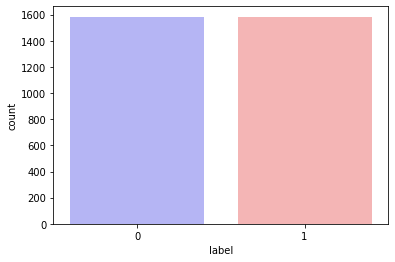

In [9]:
data.label.value_counts()
sns.countplot(x="label", data=data, palette="bwr")
plt.show()

In [10]:
female = len(data[data.label == 0])
male = len(data[data.label == 1])
print("Persentase untuk male : {:.2f}%".format((male / (len(data.label))*100)))
print("Persentase untuk female : {:.2f}%".format((female / (len(data.label))*100)))

Persentase untuk male : 50.00%
Persentase untuk female : 50.00%


Terlihat pada Informasi diatas persentase untuk laki-laki sebesar 50% dan persentase untuk perempuan sebesar 50%.

In [11]:
x = x.as_matrix()
y = y.as_matrix()

C:\Users\FX505DY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\FX505DY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## 5. Splitting dan Modelling 

In [12]:
from sklearn.utils import shuffle  
x, y = shuffle(x, y, random_state=1010101)

In [13]:
trainX = x[:int(len(x) * 0.7)]
trainY = y[:int(len(y) * 0.7)]
validateX = x[int(len(x) * 0.7) : int(len(x) * 0.9)]
validateY = y[int(len(y) * 0.7) : int(len(y) * 0.9)]
testX = x[int(len(x) * 0.9):]
testY = y[int(len(y) * 0.9):]

print (len(trainX))
print (len(validateX))
print (len(testX))

2217
634
317


In [14]:
trainX = np.array(trainX)
trainY = np.array(trainY)
validateX = np.array(validateX)
validateY = np.array(validateY)
testX = np.array(testX)
testY = np.array(testY)

In [15]:
print(trainX.shape)

(2217, 20)


Membuat model Artificial Neural Network dengan 100 hiden layer pertama dan 100 hiden layer kedua dan output 1 layer.

In [16]:
from tensorflow.keras import backend
model = Sequential()
model.add(Dense(len(trainX[0]), input_dim=len(trainX[0]), activation='relu')) #Input Dim
model.add(Dense(100, activation='relu')) #Hidden Layer Pertama
model.add(Dense(100, activation='relu')) #Hidden Layer Kedua
model.add(Dense(1, activation='sigmoid')) #Hidden Layer Keluaran (Output Hidden Laayer)

Meenjalankan ANN

In [17]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Setalah itu kita lakukan fit model. Tahap ini dilakukan proses untuk mendapatkan akurasi dan loss dari dataset.

In [18]:
acc_training = model.fit(trainX, trainY, epochs=1000, batch_size=1000, validation_data = (validateX, validateY))



Train on 2217 samples, validate on 634 samples
Epoch 1/1000
2217/2217 [==============================] - 2s 1ms/step - loss: 0.2679 - acc: 0.5061 - val_loss: 0.2706 - val_acc: 0.4826
Epoch 2/1000
2217/2217 [==============================] - 0s 10us/step - loss: 0.2754 - acc: 0.5034 - val_loss: 0.2603 - val_acc: 0.4826
Epoch 3/1000
2217/2217 [==============================] - 0s 11us/step - loss: 0.2529 - acc: 0.5273 - val_loss: 0.2513 - val_acc: 0.5836
Epoch 4/1000
2217/2217 [==============================] - 0s 11us/step - loss: 0.2530 - acc: 0.5882 - val_loss: 0.2530 - val_acc: 0.5741
Epoch 5/1000
2217/2217 [==============================] - 0s 10us/step - loss: 0.2491 - acc: 0.5553 - val_loss: 0.2450 - val_acc: 0.4858
Epoch 6/1000
2217/2217 [==============================] - 0s 9us/step - loss: 0.2402 - acc: 0.5268 - val_loss: 0.2461 - val_acc: 0.4811
Epoch 7/1000
2217/2217 [==============================] - 0s 9us/step - loss: 0.2429 - acc: 0.5241 - val_loss: 0.2435 - val_acc: 0.

Setelah data di training, lalu data dapat dievaluasi melalui proses evaluasi model dan hasil dari akurasi akan dapat ditampilkan.

In [19]:
acc_testing  = model.evaluate(validateX, validateY) 
print('akurasinya adalah {:.2f}%\nTest Loss: {:.2f}%'.format(acc_testing[1]*100,acc_testing[0]*100))

634/634 [==============================] - 0s 43us/step
akurasinya adalah 96.85%
Test Loss: 2.78%


## 6. Plotting Model Akurasi dan Loss Akurasi

Tahap ini untuk melihat visualisasi dari data yang sudah di trainning tadi.

<div class="alert alert-warning">Perintah dibawah ini untuk menampilkan Grafik Dari Akurasi.</div>

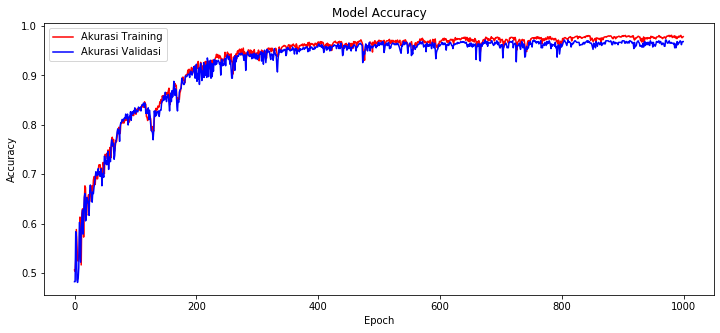

In [20]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['acc'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_acc'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()

<div class="alert alert-warning">Perintah dibawah ini untuk menampilkan Grafik Loss.</div>

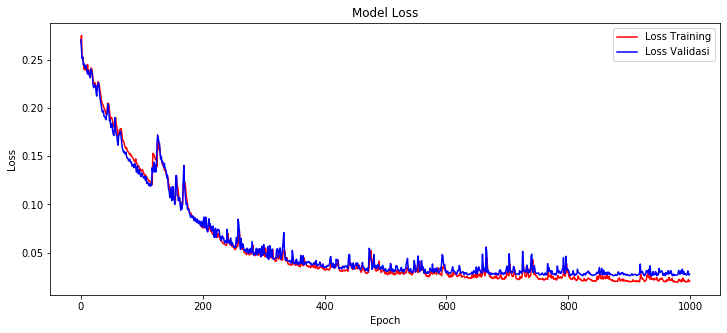

In [21]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

## 7. Confusion Matrix

Confusion matrix adalah salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi.Pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi yaitu :
1. TP adalah True Positive, yaitu jumlah data positif yang terklasifikasi dengan benar oleh sistem.
2. TN adalah True Negative, yaitu jumlah data negatif yang terklasifikasi dengan benar oleh sistem.
3. FN adalah False Negative, yaitu jumlah data negatif namun terklasifikasi salah oleh sistem.
4. FP adalah False Positive, yaitu jumlah data positif namun terklasifikasi salah oleh sistem.

Berdasarkan nilai True Negative (TN), False Positive (FP), False Negative (FN), dan True Positive (TP) dapat diperoleh nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score. Untuk memperoleh nilai akurasi, presisi dan recall kita dapat menggunakan rumus :

$$Accuracy = \frac {tp+tn}{tp+tn+fp+fn}$$

$$Specificity = \frac {tn}{tn+fp}$$

$$Sensitivity = \frac {tp}{tp+fn}$$

$$Precision = \frac {tp}{tp+fp}$$

$$F1 Score = \frac {2 \times Sensitivity \times Precision}{Sensitivity+ Precision}$$

Untuk dapat menghitung Confusion Matrix pada dataset yang telah diolah, kita deklarasikan model predict dari data training dan data testing

In [22]:
training_predicted = model.predict(trainX)
testing_predicted = model.predict(validateX)

In [23]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(trainY,training_predicted.round())
testing_cm = confusion_matrix(validateY,testing_predicted.round())

<div class="alert alert-warning"><font color="black">Hasil Confusion Matrix dari data training</font></div>

In [24]:
print(training_cm)

[[1082   34]
 [  14 1087]]


Perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada data training

In [25]:
#training
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.9783491204330176
Specificity training 0.9872842870118075
Sensitivity training 0.9695340501792115
Precision training 0.9872262773722628
F1 Score training 0.9783001808318263


<div class="alert alert-warning"><font color="black">Hasil Confusion Matrix dari data testing</font></div>

In [26]:
print(testing_cm)

[[294  12]
 [  8 320]]


Perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada data testing

In [27]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.9684542586750788
Specificity testing 0.975609756097561
Sensitivity testing 0.9607843137254902
Precision testing 0.9735099337748344
F1 Score testing 0.9671052631578948


## 8.Referensi
<ul>
    <li>Paper: <b>Voice based gender classification using machine learning.</b></li>
    A. Raahul, R. Sapthagiri, K. Pankaj, and V. Vijayarajan, “Voice based gender classification using machine learning,” IOP Conf. Ser. Mater. Sci. Eng., vol. 263, no. 4, 2017<br><br>
    <li>Dataset: <a href="https://www.kaggle.com/primaryobjects/voicegender">https://www.kaggle.com/primaryobjects/voicegender</a></li>
</ul>